In [21]:
df_wine = pd.read_csv('data/wine.data',header = None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

print('Class labels', np.unique(df_wine['Class label']))
df_wine.head()

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [22]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y)
#stratify=y 根據原樣本y的類別比例隨機分配至測試資料

print(X_train.shape, X_test.shape)

(124, 13) (54, 13)


In [24]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)
X_train_std[:3]

array([[ 0.71225893,  2.22048673, -0.13025864,  0.05962872, -0.50432733,
        -0.52831584, -1.24000033,  0.84118003, -1.05215112, -0.29218864,
        -0.20017028, -0.82164144, -0.62946362],
       [ 0.88229214, -0.70457155,  1.17533605, -0.09065504,  2.34147876,
         1.01675879,  0.66299475,  1.0887425 , -0.49293533,  0.13152077,
         1.33982592,  0.54931269,  1.47568796],
       [ 0.84585645, -0.73022996,  1.17533605,  0.81104754,  0.13597904,
         1.09807851,  1.16326665, -0.64419483,  1.25249578,  0.25863359,
         1.06806189,  0.1308109 ,  1.62934866]])

#### 因素分析

In [55]:
df_pc = pd.DataFrame(pca.components_[0:2], columns=df_wine.columns[1:])
df_pc.index = [f"PC{c}" for c in['1', '2']]
df_pc.style\
    .background_gradient(cmap='bwr', axis=None,text_color_threshold= 0)\
    .format("{:.2}")


,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
PC1,-0.14,0.25,-0.025,0.21,-0.15,-0.39,-0.42,0.31,-0.31,0.076,-0.33,-0.37,-0.3
PC2,0.5,0.16,0.24,-0.11,0.29,0.051,-0.023,0.09,0.0084,0.55,-0.21,-0.25,0.38


PC1 跟Malic acid,Alcalinity of ash,Nonflavanoid phenols 相關
PC2 跟Alcohol,Ash,Magnesium,Color intensity,Proline 相關.  
綜合來看1&3應該依靠酒精濃度和顏色深淺來區分,而13和2最大的區分是依靠酒精濃度和顏色深淺

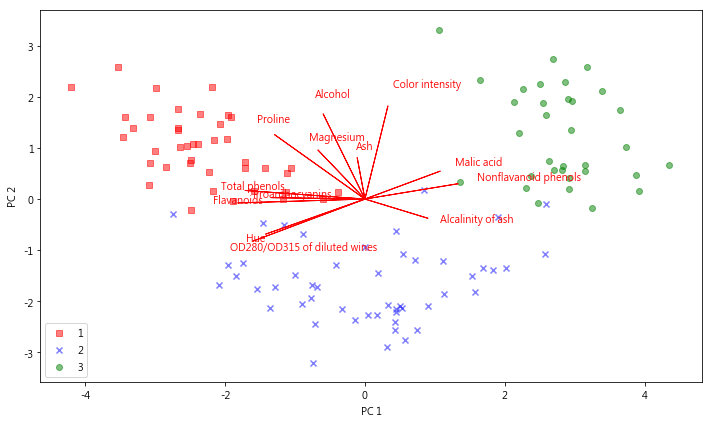

<Figure size 720x432 with 0 Axes>

In [95]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0], 
                X_train_pca[y_train == l, 1], 
                c=c, label=l, marker=m,alpha = 0.5)


xs = pca.transform(X_train_std)[:,0] # see 'prcomp(my_data)$x' in R
ys = pca.transform(X_train_std)[:,1]
for i in range(pca.components_.shape[1]):
# arrows project features (ie columns from csv) as vectors onto PC axes
    plt.arrow(0, 0, pca.components_[0,i] * max(xs),pca.components_[1,i]*max(ys),
              color='r', width=0.0005, head_width=0.0025)
    plt.text(pca.components_[0,i]* max(xs)*1.2,pca.components_[1,i]* max(ys)*1.2,
             list(df_wine.columns.values)[i+1], color='r')
    
    
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.figure(figsize=(10, 6))
# plt.savefig('images/05_03.png', dpi=300)
plt.show()